## 1. IMPORT PACKAGES

In [14]:
# Scikit-learn for machine learning and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer



In [12]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [15]:
# Text Processing
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer



In [16]:
# Modeling and Hyperparameter tuning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV



In [17]:
# Metrics for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error



In [19]:
# Download required NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


True

## 2. DATA UNDERSTANDING

#### Data Understanding

The provided datasets contain information about various entities, including metadata and textual descriptions. Here's an overview of both the **Train** and **Test** datasets:

#### **Train Dataset**:
- **Number of rows**: 100,000
- **Columns**:
  1. **ENTITY_ID**: (int64) Unique identifier for each entity.
  2. **CATEGORY_ID**: (int64) Represents the category to which the entity belongs.
  3. **ENTITY_LENGTH**: (float64) The target variable, representing the length of the entity. This is what we are trying to predict.
  4. **ENTITY_DESCRIPTION**: (object) A textual description of the entity, potentially containing key information that may help in predicting the entity's length.

#### **Test Dataset**:
- **Number of rows**: 20,000
- **Columns**:
  1. **ENTITY_ID**: (int64) Unique identifier for each entity.
  2. **CATEGORY_ID**: (int64) Represents the category to which the entity belongs.
  3. **ENTITY_DESCRIPTION**: (object) A textual description of the entity, similar to the train dataset.

### Observations:
- **Train Data**: The train dataset includes both the **ENTITY_LENGTH** (target variable) and features such as the **CATEGORY_ID** and **ENTITY_DESCRIPTION**. The latter contains important textual information that could be relevant for predicting the length of the entity.
- **Test Data**: The test dataset is similar to the train dataset but without the **ENTITY_LENGTH**. This will be used for testing the model's predictions.

### Next Steps:
1. **Preprocessing**: Clean and preprocess the text in the **ENTITY_DESCRIPTION** column.
2. **Feature Engineering**: Extract useful features from **ENTITY_DESCRIPTION** and combine them with **CATEGORY_ID**.
3. **Model Building**: Develop machine learning models to predict **ENTITY_LENGTH** using the provided features.


In [25]:
# Read the datasets
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

# Display basic information and structure of the data
train_info = train_df.info()
test_info = test_df.info()

# Display the first few rows of the datasets to understand the content
train_head = train_df.head()
test_head = test_df.head()

(train_info,  train_head)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ENTITY_ID           100000 non-null  int64  
 1   CATEGORY_ID         100000 non-null  int64  
 2   ENTITY_LENGTH       100000 non-null  float64
 3   ENTITY_DESCRIPTION  100000 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ENTITY_ID           20000 non-null  int64 
 1   CATEGORY_ID         20000 non-null  int64 
 2   ENTITY_DESCRIPTION  20000 non-null  object
dtypes: int64(2), object(1)
memory usage: 468.9+ KB


(None,
    ENTITY_ID  CATEGORY_ID  ENTITY_LENGTH  \
 0     216064          112     600.000000   
 1    2498090         8360     984.251967   
 2     210860           30     850.000000   
 3     285757         6104     744.000000   
 4    1869643         2201     600.000000   
 
                                   ENTITY_DESCRIPTION  
 0                               Caricaturas (1892)    
 1  VJ Interior Modern Solid Interio Cushioned Bar...  
 2  Pam: Personalized Name Journal with Blank Line...  
 3  Hio Nya Testamenti Drottins Vors Jesu Krists A...  
 4  ADDIT Phone Case for Samsung Galaxy A50 [ Mili...  )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ENTITY_ID           100000 non-null  int64  
 1   CATEGORY_ID         100000 non-null  int64  
 2   ENTITY_LENGTH       100000 non-null  float64
 3   ENTITY_DESCRIPTION  100000 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ENTITY_ID           20000 non-null  int64 
 1   CATEGORY_ID         20000 non-null  int64 
 2   ENTITY_DESCRIPTION  20000 non-null  object
dtypes: int64(2), object(1)
memory usage: 468.9+ KB


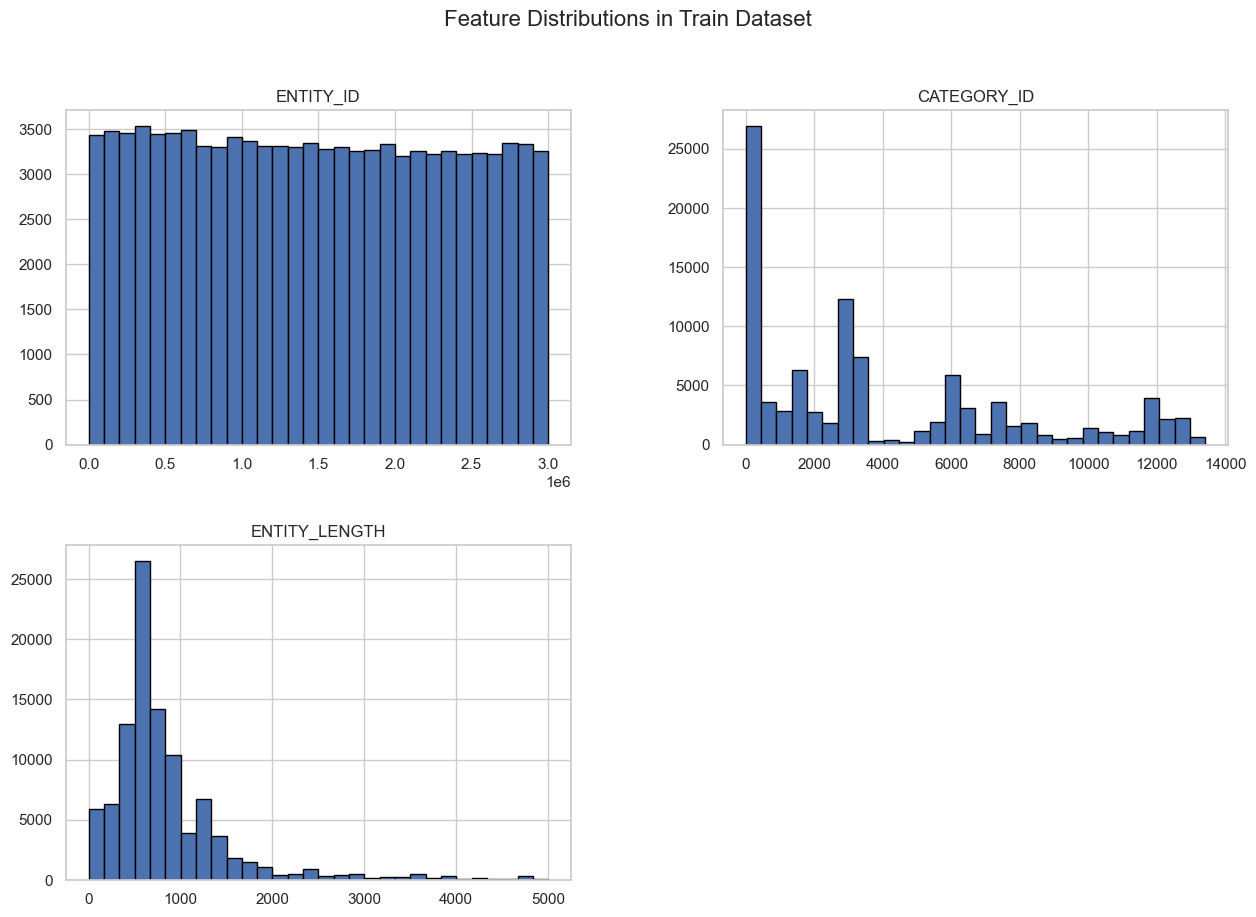

In [6]:
# Read the datasets
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

# Display basic information and structure of the data
train_info = train_df.info()
test_info = test_df.info()

# Display the first few rows of the datasets to understand the content
train_head = train_df.head()
test_head = test_df.head()



# 2. Visualizing the distribution of numerical features
train_df.select_dtypes(include=[np.number]).hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Feature Distributions in Train Dataset', fontsize=16)
plt.show()




## 3. PRE PROCESSING

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer and Label Encoder
tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words=custom_stopwords)
label_encoder = LabelEncoder()

# Vectorize the 'ENTITY_DESCRIPTION' column in training data
train_tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['ENTITY_DESCRIPTION'])

# Convert TF-IDF matrix to a DataFrame
train_tfidf_df = pd.DataFrame(train_tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Encode 'CATEGORY_ID'
train_df['CATEGORY_ID'] = label_encoder.fit_transform(train_df['CATEGORY_ID'])

# Combine text features and encoded 'CATEGORY_ID'
train_combined = pd.concat([train_df[['CATEGORY_ID']], train_tfidf_df], axis=1)

# Add the target variable 'ENTITY_LENGTH' to the training set
train_combined['ENTITY_LENGTH'] = train_df['ENTITY_LENGTH']

# The training data is now ready


In [29]:
# Manually defining a basic set of stopwords for English
custom_stopwords = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your',
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it',
    "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
    'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has',
    'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before',
    'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',
    'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most',
    'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can',
    'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren',
    "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven',
    "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't",
    'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
]

# Initialize TF-IDF Vectorizer with the custom stopword list
tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words=custom_stopwords)

# Apply TF-IDF Vectorizer on 'ENTITY_DESCRIPTION'
tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['ENTITY_DESCRIPTION'])

# Convert to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Check the shape and first few columns of the transformed text data
tfidf_df.shape, tfidf_df.head()


((100000, 500),
     10  100   11   12   13   14       15   16        18   20  ...  women  \
 0  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.000000  0.0  ...    0.0   
 1  0.0  0.0  0.0  0.0  0.0  0.0  0.16158  0.0  0.491232  0.0  ...    0.0   
 2  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.000000  0.0  ...    0.0   
 3  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.000000  0.0  ...    0.0   
 4  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.000000  0.0  ...    0.0   
 
    womens  wood  wooden  work  world  year  years    yellow  zipper  
 0     0.0   0.0     0.0   0.0    0.0   0.0    0.0  0.000000     0.0  
 1     0.0   0.0     0.0   0.0    0.0   0.0    0.0  0.087055     0.0  
 2     0.0   0.0     0.0   0.0    0.0   0.0    0.0  0.000000     0.0  
 3     0.0   0.0     0.0   0.0    0.0   0.0    0.0  0.000000     0.0  
 4     0.0   0.0     0.0   0.0    0.0   0.0    0.0  0.000000     0.0  
 
 [5 rows x 500 columns])

#### ENCODING

In [26]:
from sklearn.preprocessing import LabelEncoder

# Initialize the Label Encoder
label_encoder = LabelEncoder()

# Apply Label Encoding to 'CATEGORY_ID'
train_df['CATEGORY_ID'] = label_encoder.fit_transform(train_df['CATEGORY_ID'])

# Check encoded values
print(train_df['CATEGORY_ID'].head())


0     112
1    4479
2      30
3    3312
4    1486
Name: CATEGORY_ID, dtype: int64


## Feature Engineering

#### COMBING TEXT FEATURE

In [27]:
# Combine tfidf features with the other features
train_combined = pd.concat([train_df[['CATEGORY_ID']], tfidf_df], axis=1)

# Add the target variable 'ENTITY_LENGTH'
train_combined['ENTITY_LENGTH'] = train_df['ENTITY_LENGTH']

# Check the final DataFrame
print(train_combined.head())


   CATEGORY_ID   10  100   11   12   13   14       15   16        18  ...  \
0          112  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.000000  ...   
1         4479  0.0  0.0  0.0  0.0  0.0  0.0  0.16158  0.0  0.491232  ...   
2           30  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.000000  ...   
3         3312  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.000000  ...   
4         1486  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.000000  ...   

   womens  wood  wooden  work  world  year  years    yellow  zipper  \
0     0.0   0.0     0.0   0.0    0.0   0.0    0.0  0.000000     0.0   
1     0.0   0.0     0.0   0.0    0.0   0.0    0.0  0.087055     0.0   
2     0.0   0.0     0.0   0.0    0.0   0.0    0.0  0.000000     0.0   
3     0.0   0.0     0.0   0.0    0.0   0.0    0.0  0.000000     0.0   
4     0.0   0.0     0.0   0.0    0.0   0.0    0.0  0.000000     0.0   

   ENTITY_LENGTH  
0     600.000000  
1     984.251967  
2     850.000000  
3     744.000000  
4     600.00000

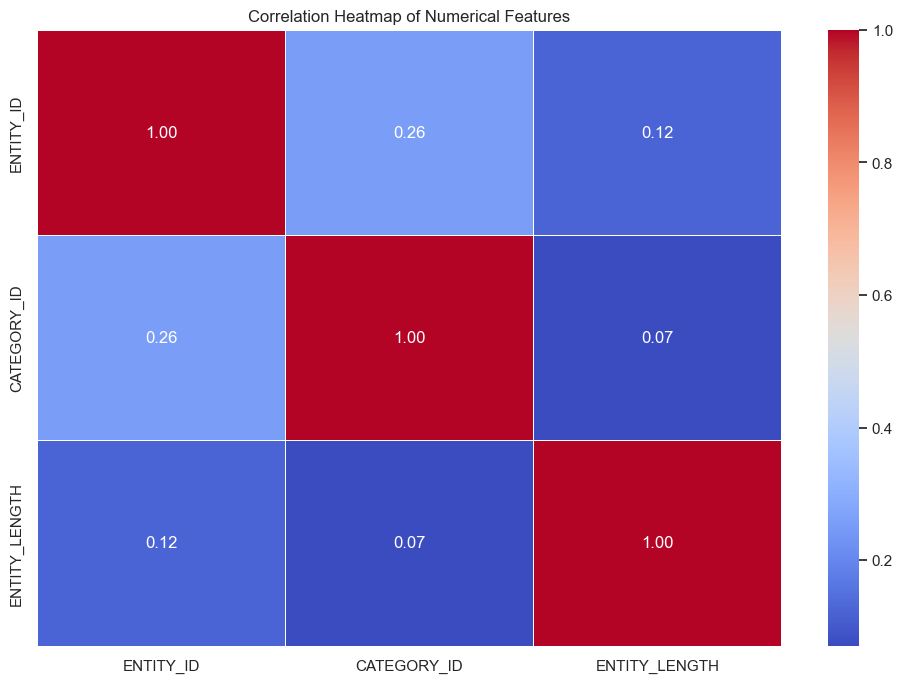

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming train_df is already loaded (e.g., train_df = pd.read_csv('Train.csv'))

# Select only numerical columns from the dataset
numerical_cols = train_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numerical_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()
